# Placement Prediction Classifier using ML

### Register no: RA1811031010015
### Name: Shamik Basu
### Class: CSE-IT 'K1'
### Dataset link: https://www.kaggle.com/tejashvi14/engineering-placements-prediction

In [295]:

warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib import rcParams

from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.metrics import recall_score, precision_score, confusion_matrix

rcParams['figure.figsize'] = [18, 7]
rcParams['font.size'] = '18'
sns.set_style('darkgrid')

## Data Cleaning

In [296]:
file_name = '/home/shamik/Desktop/Shamik/SRM/ML_Sem_7/regression_015/collegePlace.csv'

df = pd.read_csv(file_name, header=0)

df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [297]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [299]:
df.memory_usage()

Index                  128
Age                  23728
Gender               23728
Stream               23728
Internships          23728
CGPA                 23728
Hostel               23728
HistoryOfBacklogs    23728
PlacedOrNot          23728
dtype: int64

In [300]:
df.memory_usage().sum()

189952

In [301]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [302]:
df.mean()

Age                  21.485840
Internships           0.703641
CGPA                  7.073837
Hostel                0.269049
HistoryOfBacklogs     0.192178
PlacedOrNot           0.552596
dtype: float64

In [303]:
df.var()

Age                  1.755449
Internships          0.547892
CGPA                 0.936536
Hostel               0.196728
HistoryOfBacklogs    0.155298
PlacedOrNot          0.247317
dtype: float64

In [304]:
df.skew()

Age                  0.996099
Internships          0.789343
CGPA                 0.006222
Hostel               1.042100
HistoryOfBacklogs    1.563290
PlacedOrNot         -0.211665
dtype: float64

In [305]:
df.kurtosis()

Age                  2.831266
Internships          0.084428
CGPA                -0.757038
Hostel              -0.914646
HistoryOfBacklogs    0.444176
PlacedOrNot         -1.956518
dtype: float64

In [306]:
df.min()

Age                      19
Gender               Female
Stream                Civil
Internships               0
CGPA                      5
Hostel                    0
HistoryOfBacklogs         0
PlacedOrNot               0
dtype: object

In [307]:
df.max()

Age                          30
Gender                     Male
Stream               Mechanical
Internships                   3
CGPA                          9
Hostel                        1
HistoryOfBacklogs             1
PlacedOrNot                   1
dtype: object

In [308]:
df.median()

Age                  21.0
Internships           1.0
CGPA                  7.0
Hostel                0.0
HistoryOfBacklogs     0.0
PlacedOrNot           1.0
dtype: float64

In [309]:
df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


## Data Exploration

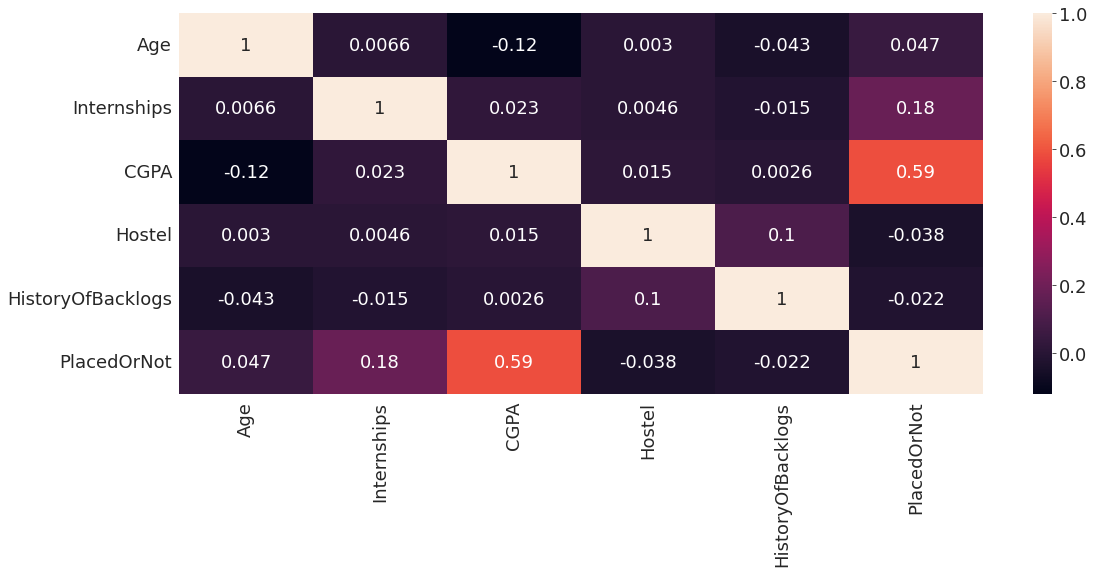

In [310]:
sns.heatmap(df.corr(), annot=True);

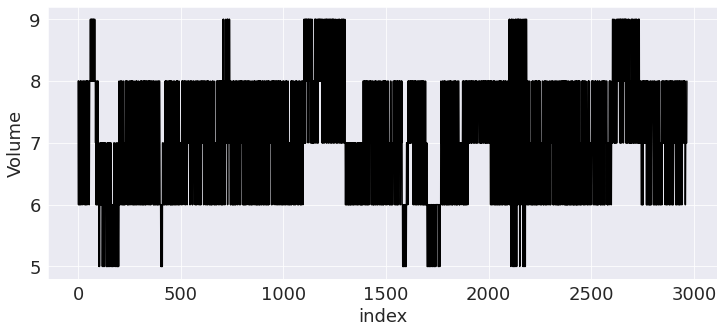

In [311]:
df['CGPA'].plot(figsize=(12, 5), color='black') # color and figsize changed

plt.xlabel('index')
plt.ylabel('Volume');

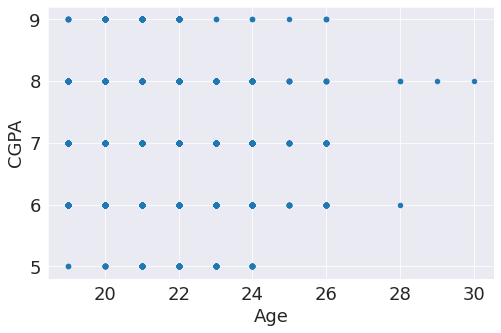

In [312]:
df.plot.scatter('Age', 'CGPA', figsize=(8, 5));

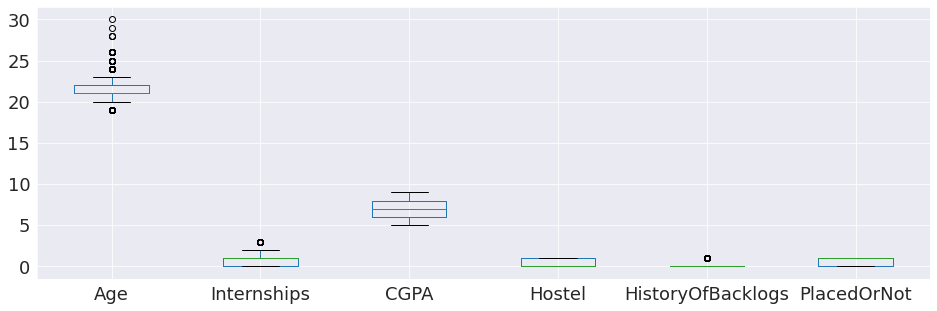

In [313]:
df.boxplot(figsize=(16, 5));

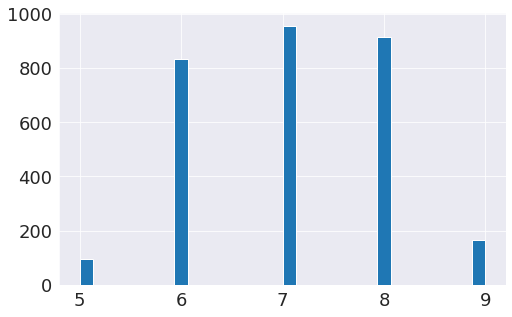

In [314]:
df['CGPA'].hist(bins=30, figsize=(8, 5));

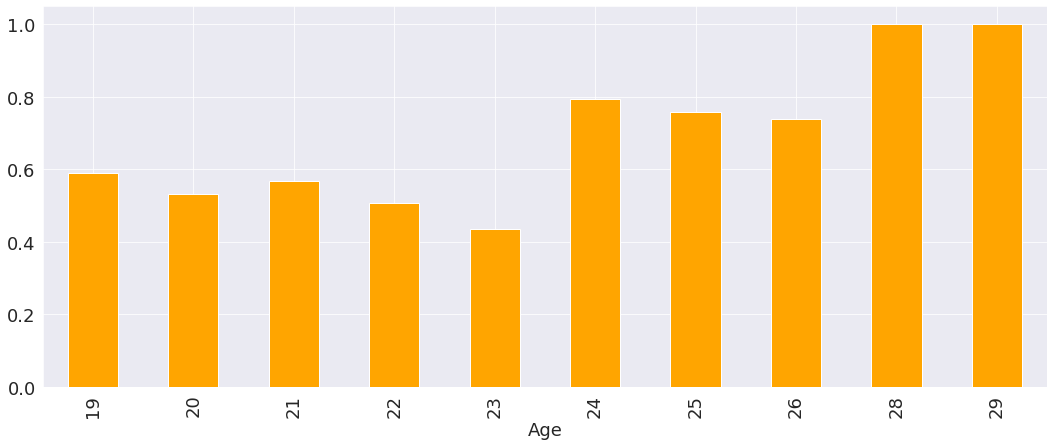

In [315]:
df_avg_placed = df.groupby('Age')['PlacedOrNot'].mean()
df_avg_placed[:10].plot.bar(color='orange');

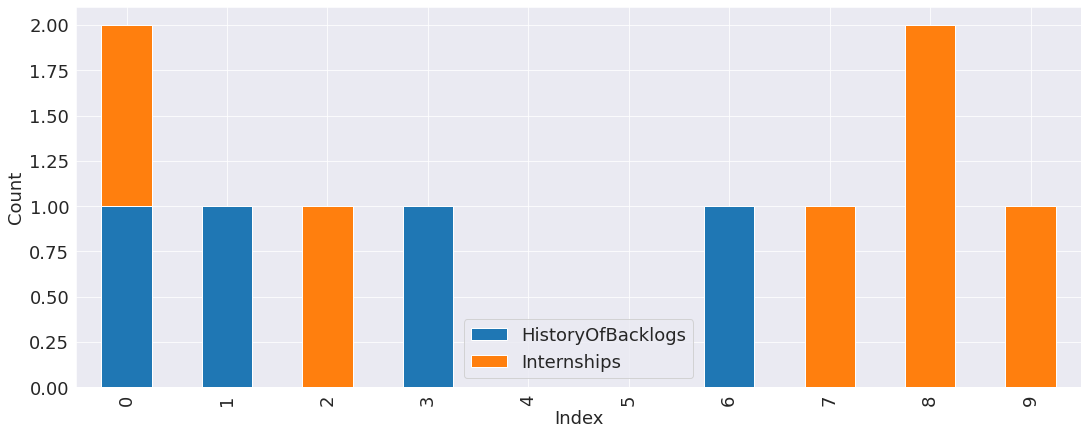

In [316]:
ax = df[['HistoryOfBacklogs', 'Internships']][:10].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");

## Encoding

In [317]:
# Encoding of objects using Label Encoder as we dont require One-Hot Encoding

from sklearn.preprocessing import LabelEncoder

features = df.select_dtypes("object").columns

le = LabelEncoder()

for feature in features: 
    df[feature] = le.fit_transform(df[feature])## Encoding

In [318]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


## Target Variable Selection

In [319]:
#X = df.drop(['PlacedOrNot'],axis=1)
#y = pd.DataFrame(df['PlacedOrNot'])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Data Split using K-Fold and Train Test Split

In [320]:
from sklearn.model_selection import train_test_split
#Splitting data into 1/3 for test and the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [321]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

result = cross_val_score(model , X, y, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7562516678874183


## Model Selection

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [323]:
#Linear SVM Classifier

sv = SVC(kernel="linear", C=0.025)

sv.fit(X_train, y_train)
print("Train Score: ", sv.score(X_train, y_train)*100 , "%")
print("Test Score: ", sv.score(X_test, y_test)*100, "%")

Train Score:  76.79919476597887 %
Test Score:  75.68947906026557 %


In [324]:
# K Neighbours Classifier

kn = KNeighborsClassifier(3)

kn.fit(X_train, y_train)
print("Train Score: ", kn.score(X_train, y_train)*100 , "%")
print("Test Score: ", kn.score(X_test, y_test)*100, "%")

Train Score:  89.63261197785607 %
Test Score:  87.64044943820225 %


In [325]:
#Random Forest Classifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train)*100 , "%")
print("Test Score: ", rf.score(X_test, y_test)*100, "%")

Train Score:  87.36789129340715 %
Test Score:  88.1511746680286 %


In [326]:
# Naive Bayes Classifier

nb = GaussianNB()

nb.fit(X_train, y_train)
print("Train Score: ", nb.score(X_train, y_train)*100 , "%")
print("Test Score: ", nb.score(X_test, y_test)*100, "%")

Train Score:  81.83190739808757 %
Test Score:  81.40960163432074 %


In [327]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train)*100 , "%")
print("Test Score: ", dt.score(X_test, y_test)*100, "%")

Train Score:  92.55158530447912 %
Test Score:  87.74259448416751 %


## Model Evaluation

In [328]:
# Decision Tree is selected for better perfoemance and evaluation for the same is conducted.

y_pred = dt.predict(X_test)

print("Recall score:", recall_score(y_test, y_pred, average='macro'))
print("Precision score:", precision_score(y_test, y_pred, average='macro'))
print ("Confusio Matrix:\n", confusion_matrix(y_test, y_pred))

Recall score: 0.880707921334581
Precision score: 0.8770023790642347
Confusio Matrix:
 [[403  38]
 [ 82 456]]


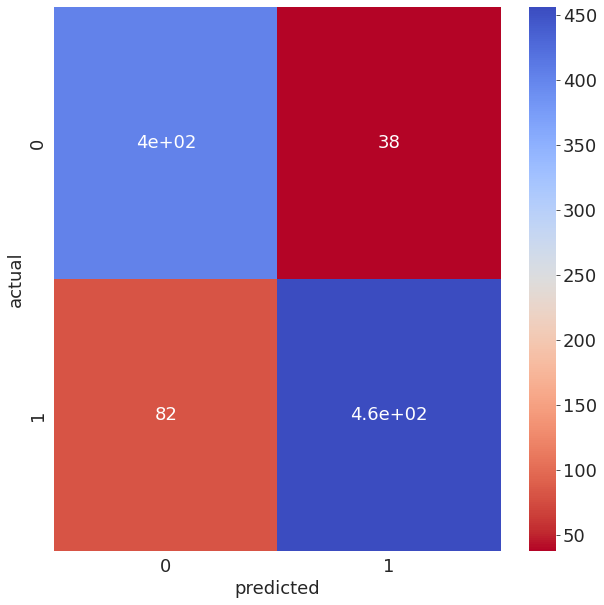

In [329]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm_r')
plt.xlabel('predicted')
plt.ylabel('actual');

# Model has been developed with 87% accuracy using Decision Tree Classifier